In [2]:
from astropy.time import Time
from astropy.coordinates.calculation import horoscope
saskia = Time("1996-06-24T08:00")
axel = Time("1994-11-27T08:00")
gustav = Time("1991-09-18T22:00")
miriam = Time("1993-04-20T04:00")
horoscope(miriam,corrected=True)

*******************************************************************************
Horoscope for Aries on 2025-02-13:
*******************************************************************************
Give yourself plenty of time to wake up this morning, dear Aries, as the Virgo
moon and Venus form an unbalanced connection. Connect with your body and set an
intention for the day before entering the world, cultivating confidence and
order. Things move more fluidly as the hours pass, especially when teamwork is
embraced. Just beware of how too many opinions can throw projects off track
when Luna squares Jupiter later today. Take things easy as evening sets in,
staying true to routines that maximize your health and wellness game, and be
sure to head to bed at a reasonable hour.


N_0 = 29.169 ± 1.626
tau  = 2647.139 ± 175.648


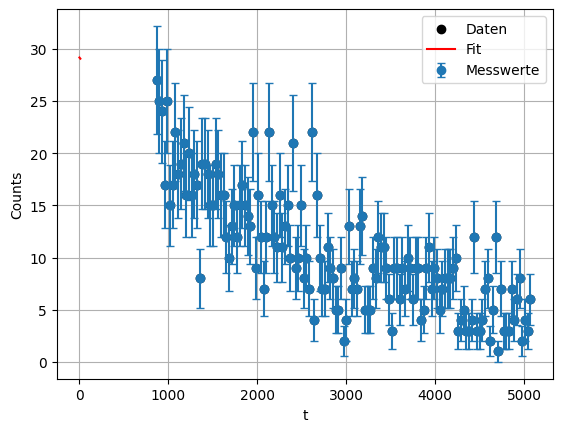

In [ ]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

n = 5
max = 34*n

# Messdaten (Zeit in ns, gemessene Ereignisse)
duration=156657
counts = pd.read_csv("../data/Axel_neu.Spe", skiprows=12, skipfooter=15, names=['counts'], engine='python').astype(float).to_numpy()
counts = np.ravel(counts)
counts = counts[:max]


search_time = 30 # ns
def reduce_counts_to_mean(counts, n, max):
    reduced_counts=np.array([])
    reduced_counts_error = np.array([])
    divisor = 1/np.sqrt(n)
    for k in range(0,max, n):
        counts_mean = np.mean(counts[k:k+n])
        counts_error = np.std(counts[k:k+n])*divisor

        reduced_counts = np.append(reduced_counts,counts_mean)
        reduced_counts_error = np.append(reduced_counts_error,counts_error)
    
    return reduced_counts, reduced_counts_error

def cutter(time, counts, min, max):
    cut_time = np.append(time[:min],time[max:])
    cut_counts = np.append(counts[:min],counts[max:])

    return cut_time, cut_counts

counts_mean, counts_error = reduce_counts_to_mean(counts, n, max) 

time = np.arange(0,max,1) * 30
# plt.scatter(time,counts[:max])

# time, counts = cutter(time,counts,17,29)
# time, counts = cutter(time, counts, 0, 7)

time, counts = cutter(time, counts, 0, 29)

errors = np.sqrt(counts)  # Poisson-Fehler als Wurzel der Zählrate

plt.errorbar(time, counts, yerr=errors, fmt='o', label="Messwerte", capsize=3)

np.arange(0,duration, search_time)


# Exponentielles Modell für den Zerfall: N(t) = N0 * exp(-t / tau)
def model(t, N_0, tau):
    return N_0 * np.exp(-t / tau)  # Funktion erwartet 3 Parameter

# Curve Fit durchführen
params, pcov = curve_fit(model, time, counts, p0=[counts[0], 50])  # Startwerte für N_0, tau, U_0
err = np.sqrt(np.diag(pcov))  # Fehler aus Kovarianzmatrix

# Fit-Ergebnisse ausgeben
print(f"N_0 = {params[0]:.3f} ± {err[0]:.3f}")
print(f"tau  = {params[1]:.3f} ± {err[1]:.3f}")

# Fit plotten
t_fit = np.linspace(0, 10, 1000)
plt.scatter(time, counts, label="Daten", color="black")
plt.plot(t_fit, model(t_fit, *params), label="Fit", color="red")
plt.xlabel("t")
plt.ylabel("Counts")
plt.legend()
plt.grid()
plt.show()

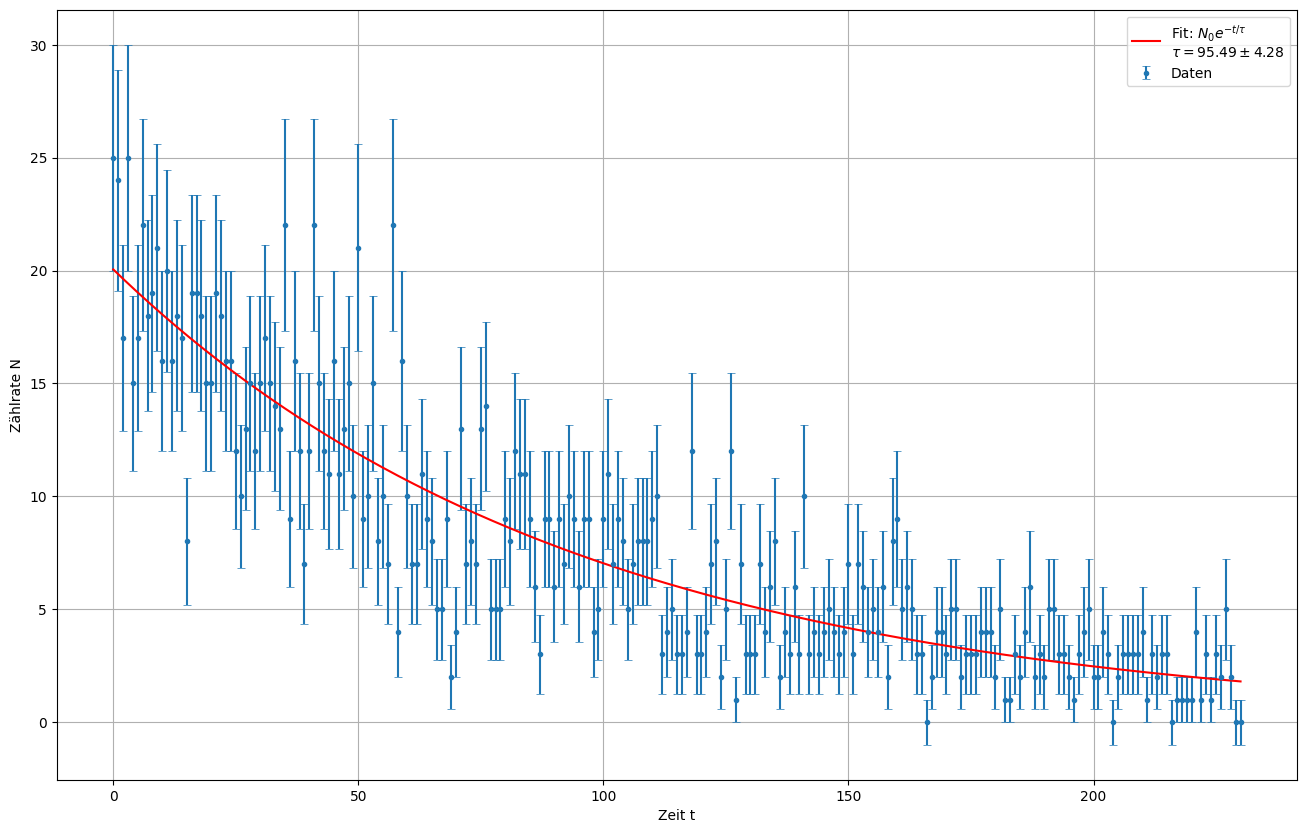

In [4]:
counts = pd.read_csv("../data/Axel_neu.Spe", skiprows=12+30, skipfooter=15+250, names=['counts'], engine='python').astype(float).to_numpy()
counts = np.ravel(counts)

# Zeitachsen definieren
t = np.arange(len(counts))


# Exponentieller Fit
def exp_decay(t, N0, tau):
    return N0 * np.exp(-t / tau)

popt, pcov = curve_fit(exp_decay, t, counts, p0=[counts[0], 50])

# Fit-Parameter und Unsicherheiten
N0_fit, tau_fit = popt
N0_err, tau_err = np.sqrt(np.diag(pcov))

t_fit = np.linspace(0, len(counts)-1, 500)
counts_fit = exp_decay(t_fit, *popt)

# Fehlerbalken als sqrt(N), falls N > 0, sonst 1 (damit kein Fehlerbalken 0 wird)
errors = np.sqrt(counts)
errors[errors == 0] = 1

tau_fit, tau_err
plt.figure(figsize=(16,10))
plt.errorbar(t, counts, yerr=errors, fmt='o', label='Daten', markersize=3, capsize=3, capthick=0.5)
plt.plot(t_fit, counts_fit, 'r-', label=f'Fit: $N_0 e^{{-t/\\tau}}$\n$\\tau = {tau_fit:.2f} \\pm {tau_err:.2f}$')
plt.xlabel('Zeit t')
plt.ylabel('Zählrate N')
plt.legend()
plt.grid()
plt.show()

Zeit/Kanalnummer = (21.66055572190964 \pm 0.017063975077472808)ns


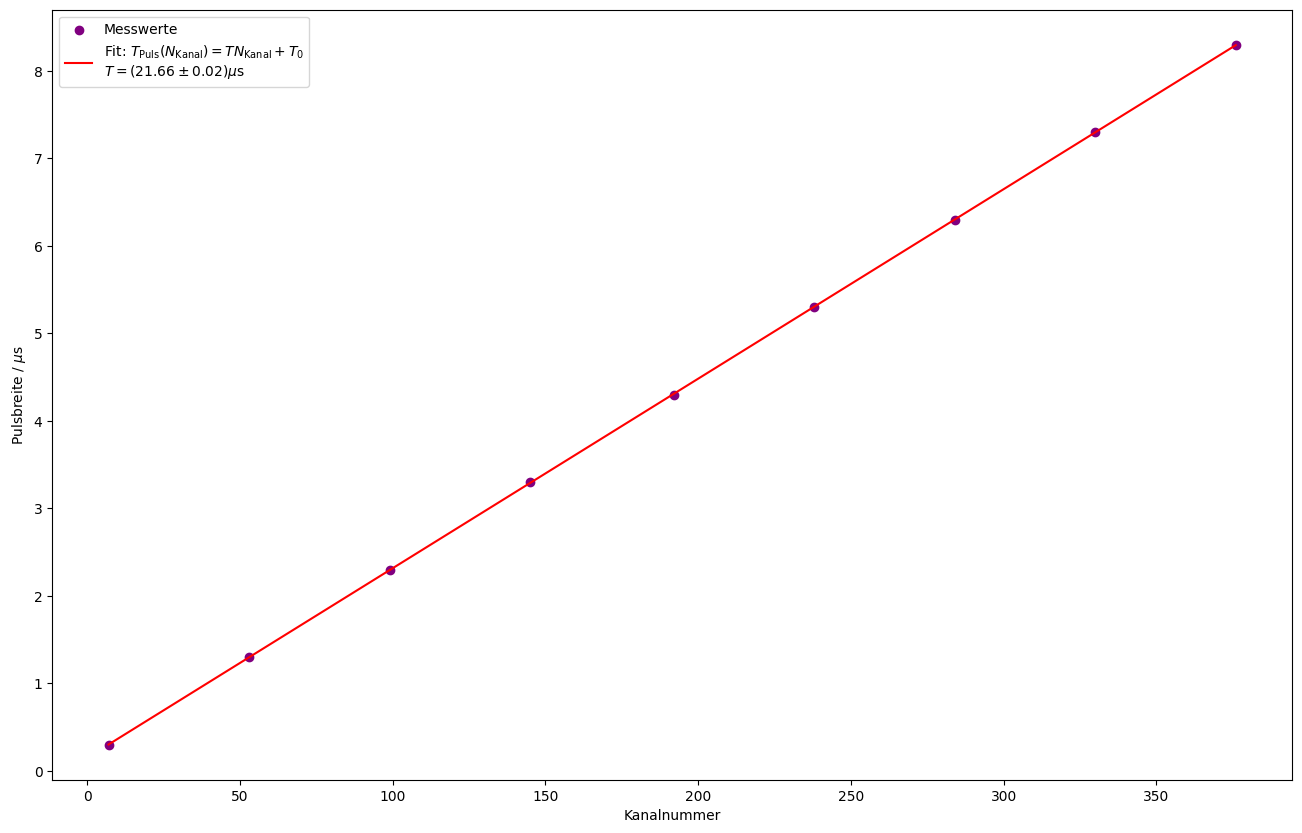

In [88]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def gerade(x,a,b):
    return a * x + b


t_array = pd.read_csv("../data/v01 bins.txt", skiprows=0).astype(float).to_numpy()
Impulsbreite = t_array[:, 0]
Kanalnummer = t_array[:, 1]

ptime, ptime_cov = curve_fit(gerade, Kanalnummer, Impulsbreite)
time = ptime[0]
time_err = np.sqrt(np.diag(ptime_cov))[0]

print(rf"Zeit/Kanalnummer = ({ptime[0]*1000} \pm {np.sqrt(ptime_cov[0,0])*1000})ns")

ptime_fit = gerade(Kanalnummer, ptime[0],ptime[1])

plt.figure(figsize=(16,10))
plt.xlabel("Kanalnummer")
plt.ylabel(r"Pulsbreite / $\mu\text{s}$")
plt.scatter(Kanalnummer,Impulsbreite, c="purple", label = "Messwerte")
plt.plot(Kanalnummer, ptime_fit, c="r", label = f"Fit: $T_\\text{{Puls}}(N_\\text{{Kanal}}) = T N_\\text{{Kanal}} + T_0$\n$T = ({time*1000:.2f} \\pm {time_err*1000:.2f})\\mu \\text{{s}}$")
plt.legend()

plt.savefig("../figures/time_fit.png")
plt.show()

20.048812669649344
2.06836784906711


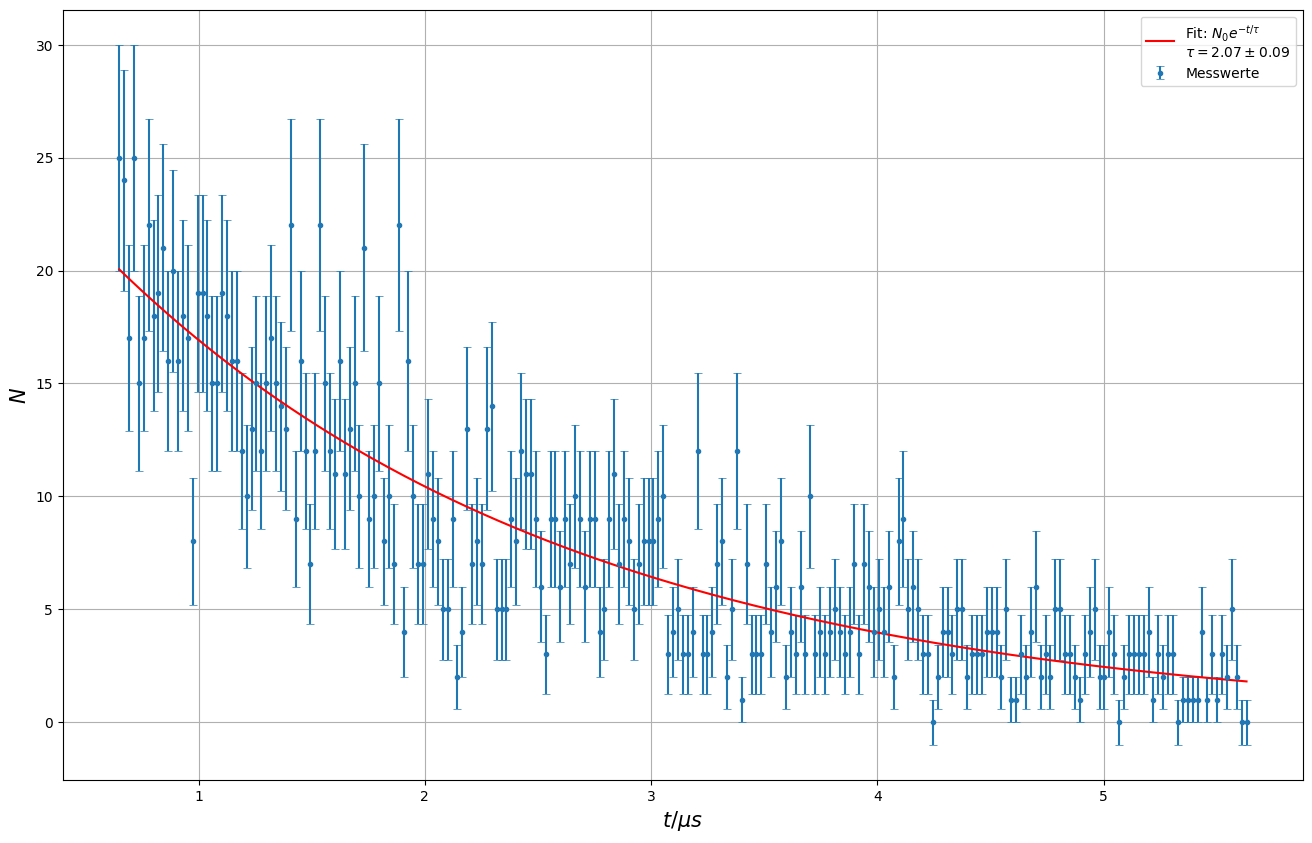

In [87]:
counts = pd.read_csv("../data/Axel_neu.Spe", skiprows=12+30, skipfooter=15+250, names=['counts'], engine='python').astype(float).to_numpy()
counts = np.ravel(counts)

# Zeitachsen definieren
t = np.arange(len(counts))


# Exponentieller Fit
def exp_decay(t, tau, N0):
    return N0 * np.exp(-t / tau)

popt, pcov = curve_fit(exp_decay, t, counts, p0=[counts[0], 50])

# Fit-Parameter und Unsicherheiten
tau_fit, N0_fit = popt
tau_err, N0_err = np.sqrt(np.diag(pcov))
print(N0_fit)

t_fit = np.linspace(0, len(counts)-1, 500)
counts_fit = exp_decay(t_fit, *popt)

# Fehlerbalken als sqrt(N), falls N > 0, sonst 1 (damit kein Fehlerbalken 0 wird)
errors = np.sqrt(counts)
errors[errors == 0] = 1

tau_fit = tau_fit * ptime[0]
print(tau_fit)
tau_err = tau_err * ptime[0] 
plt.figure(figsize=(16,10))
plt.errorbar(t*ptime[0] + ptime[0] *30, counts, yerr=errors, fmt='o', label='Messwerte', markersize=3, capsize=3, capthick=0.5)
plt.plot(t_fit*ptime[0] + ptime[0] *30, counts_fit, 'r-', label=f'Fit: $N_0 e^{{-t/\\tau}}$\n$\\tau = {tau_fit:.2f} \\pm {tau_err:.2f}$')

plt.xlabel(r'$t / \mu s$', fontsize = 15)
plt.ylabel(r'$N$', fontsize = 15)

plt.legend()
plt.grid()
plt.savefig("../figures/halflife_fit.png")
plt.show()


In [ ]:
# DataFrame in LaTeX-Tabelle umwandeln
Lebenszeit_table = pd.read_csv("../data/Axel_neu.Spe", skiprows=12, skipfooter=15, names=['Counts'], engine='python').reset_index().to_latex(index=False, longtable=True)
Eichung_table = pd.read_csv("../data/v01 bins.txt", skiprows=1, names=['Pulsbreite','Kanal'], engine='python').reset_index().to_latex(index=False, longtable=True)
# Dateipfad festlegen
Werte_Lebenszeit_path = "Werte_Lebenszeit_table.tex"
Werte_Eichung_path = "Werte_Eichung_table.tex"
# LaTeX-Code in eine Datei schreiben
# with open(Werte_Lebenszeit_path, "w") as f:
#     f.write(Lebenszeit_table)

# with open(Werte_Eichung_path, "w") as f:
#     f.write(Eichung_table)

# print(f"Die 1. LaTeX-Tabelle wurde in {Werte_Lebenszeit_path} gespeichert.")
# print(f"Die 2. LaTeX-Tabelle wurde in {Werte_Eichung_path} gespeichert.")

Die 2. LaTeX-Tabelle wurde in Werte_Eichung_table.tex gespeichert.
